<a href="https://colab.research.google.com/github/ThanhVanLe0605/Data-Mining-For-Business-Analytics-In-Python/blob/main/Chapter_4_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 4: DIMENSION REDUCTION

## TABLE OF CONTENTS

1. [4.1. INTRODUCTION](#41-introduction)
2. [4.2. CURSE OF DIMENSIONALITY](#42-curse-of-dimensionality)
3. [4.3. PRACTICAL CONSIDERATIONS](#43-practical-considerations)
   - [Example 1: House Prices in Boston](#example-1-house-prices-in-boston)
   - [TABLE 4.1.](#table-41)
   - [TABLE 4.2.](#table-42)
4. [4.4. DATA SUMMARIES](#44-data-summaries)
   - [Summary Statistics](#summary-statistics)
   - [TABLE 4.3.](#table-43)
   - [TABLE 4.4.](#table-44)
   - [Aggregation and Pivot Tables](#aggregation-and-pivot-tables)
   - [TABLE 4.5.](#table-45)
   - [TABLE 4.6.](#table-46)
5. [4.5. CORRELATION ANALYSIS](#45-correlation-analysis)
   - [TABLE 4.7.](#table-47)
6. [4.6. REDUCING THE NUMBER OF CATEGORIES IN CATEGORICAL VARIABLES](#46-reducing-the-number-of-categories-in-categorical-variables)
   - [FIGURE 4.1.](#figure-41)
   - [FIGURE 4.2.](#figure-42)
7. [4.7. CONVERTING A CATEGORICAL VARIABLE TO A NUMERICAL VARIABLE](#47-converting-a-categorical-variable-to-a-numerical-variable)
8. [4.8. PRINCIPAL COMPONENTS ANALYSIS](#48-principal-components-analysis)
   - [Example 2: Breakfast Cereals](#example-2-breakfast-cereals)
   - [TABLE 4.8](#table-48)
   - [TABLE 4.9](#table-49)
   - [TABLE 4.10](#table-410)
   - [Figure 4.3. SCATTER PLOT OF RATING VS. CALORIES](#figure-43-scatter-plot-of-rating-vs-calories)
   - [Table 4.11](#table-411)
   - [Principal Components](#principal-components)
   - [Normalizing the Data](#normalizing-the-data)
   - [TABLE 4.12](#table-412)
   - [TABLE 4.13](#table-413)
   - [Using Principal Components for Classification and Prediction](#using-principal-components-for-classification-and-prediction)
   - [Figure 4.4. Scatter Plot Of The Second VS. First Components Scores](#figure-44-scatter-plot-of-the-second-vs-first-components-scores)
9. [4.9. Dimension Reduction Using Regression Models](#49-dimension-reduction-using-regression-models)
10. [4.10. Dimension Reduction Using Classification and Regression Trees](#410-dimension-reduction-using-classification-and-regression-trees)

---


**a. Introduction to Dimension Reduction**
* **Definition:** The process of reducing the number of variables (dimensions) of a dataset.
* **Purpose:** To make data mining algorithms operate efficiently.
* **Timing:** Part of the pilot/ prototype phase, performed "before" deploying a model.

**b. Dimension Reduction Approaches**
1. **Using Domain Knowledge:**
   * *Action:* To remove or combine categories.
2. **Using Data Summaries:**
   * *Action:* To detect information overlap and remove/combine redundant variables or categories.
3. **Using Data Conversion Techniques:**
   * *Example:* Converting categorical variables into numerical variables.
4. **Using Automated Reduction Techniques:**
   * *Example:* Principal Components Analysis(PCA)**.

**c. Deep Dive into PCA(An Automated Technique)**
* **Process:** Creates a "new set of variables"(called Principal Components).
* **Nature of New Variables:** They are "weighted averages" of the original variables.
* **Key Property:** The new variables are "uncorrelated" (this ensures each new variable captures an "independent" piece of information, avoiding redundancy).
* **Benefit:** A small subset of these new variables usually contains most of the combined information, allowing for dimension reduction by using only that subset.

**d. Other Related Data Mining Methods**

* Some data mining methods can also assist in reduction:
  * a) **Regression models**
  * b) **Classification and Regression Trees (CART)**
* **Purpose (in this context):**
  * a) **For removing redundant variables.**
  * b) **For combining "similar" categories.**



## 4.1. INTRODUCTION




**In this chapter, we will use :**
* *pandas* for data handling
* *scikit-learn* for data transformations
* *matplotlib* for visualization

In [ ]:
# import required functionality for this chapter
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

#### Variable/ Feature Challenges

 **a. Feature Proliferation:**

 *The number of variables can expand quickly in the **data preparation step** due to the creation of:*
 * i) **New derived variables/ features**
 * ii) **Dummy variables** for categorical features


 **b. Consequences of Redundant Features:**

  *Including **highly correlated variables** or variables **unrelated to the outcome** can lead to:*
 * i) **Overfitting** the model.
 * ii) Reduced **accuracy** and **realiability**

 **c. Computational Cost:**

 *A large number of feature poses computational problems for both **supervised** and **unsupervised** algorithms, increasing costs for data collection and processing.*

## 4.2. CURSE OF DIMENSIONALITY




**a. Definition:**
* *Dimensionality* is the number of **predictors (input variables/ features)** used by the model.

**b. The curse:**
* The *Curse of Dimensionality* is the affliction where adding variables causes the **data space to become increasingly sparse**. Prediction/ Classification models fail because the available data is insufficient to provide a useful model across so many dimensions.

**c. Impact:**
* The difficulty increases **exponentially** with each added variable. Too many variables introduce excessive **noise**, obscuring the underlying **patterns** and structure.

**d. Solution:**
* The key step is **dimension reduction**, commonly know as **feature selection** or **feature extraction**.


## 4.3. PRACTICAL CONSIDERATIONS

**a. Domain Knowledge:**

*Integrate **domain knowledge** in the initial **data exploration step** is crucial to ensure the measured variables are reasonable for the task at hand, even though automated methods are often preferred.*

**b. Key Practical Questions for Feature Selection:**
* *i) Which variables are most **important** and which are most likely to be **useless** ?*
* *ii) Which variables are likely to contain the most **error** ?*
* *iii) Which variables will be **available for measurement** in the feature, **before** the prediction outcome occurs ?*

**c. Example:**

*You cannot use the final number of birds(an unknown outcome) as a predictor for the closing price of an ongoing online auction.*

### Example 1: House Prices in Boston

In [ ]:
table_4_01 = pd.read_excel("Description_of_Variables_In_The_Boston_Housing_Dataset.xlsx")


**TABLE 4.1.**

In [ ]:
# Allow pandas to display the full content of each column
# without truncating long text with "..."
pd.set_option('display.max_colwidth', None)
table_4_01

,CRIM,Crime rate
0,ZN,Percentage of residential land zoned for lots over 25.000 ft2
1,INDUS,Percentage of land occupied by nonretail business
2,CHAS,"Does tract bound Charles River ? (=1 if tract bounds river, =0 otherwise)"
3,NOX,Bitric oxlde concentration (parts per 10 million)
4,RM,Average number of rooms per dwelling
5,AGE,Percentage of owner-occupied units built prior to 1940
6,DIS,Weighted distances to five Boston employment centers
7,RAD,Index of accessibility to radiacal highways
8,TAX,"Full-value property tax rate per $10,000"
9,PTRATIO,Pupil-to-teacher ratio by town


In [ ]:
bostonHousing_df = pd.read_csv("BostonHousing.csv", delimiter = ",")

In [ ]:
# Remove column B
bostonHousing_df = bostonHousing_df.drop(columns=["B"])
# Create the categorical column CAT.MEDV
# 1 -> high-value neighborhood (MEDV > $30,000)
# 0 -> otherwise
bostonHousing_df["CAT_MEDV"] = (bostonHousing_df["MEDV"] > 30).astype(int)

# Check first rows
bostonHousing_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,4.9800,24.0000,0
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,9.1400,21.6000,0
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,4.0300,34.7000,1
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,2.9400,33.4000,1
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,5.3300,36.2000,1


**TABLE 4.2.**

In [ ]:
bostonHousing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,4.9800,24.0000,0
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,9.1400,21.6000,0
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,4.0300,34.7000,1
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,2.9400,33.4000,1
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,5.3300,36.2000,1


## 4.4. DATA SUMMARIES

**THE IMPORTANCE OF DATA SUMMARIES**

*Data Summaries, including numerical statistics and visualizations, are a critical initial step in **Data Exploration** to understand the characteristics of your dataset.*

**Core principal :**
*The better you understand the data, the better the results will be from the subsequent **modelling** or **data mining** process.*

**Applications for Data Reduction :** Summaries are helpful for **Data Reduction** strategies, such as:
* *Combining* **levels**(categories) of a categorical variable
* *Choosing which features to **remove***
* *Assessing the **information overlap** between variables*

###  4.4.1. Summary Statistics

The **Pandas** library offers powerful methods for generating summary statistics to analyze individual features:

The 'describe()' Method: *Provides an overview of summary statistics for **all variables** in the dataset(e.g., count, mean, satndard deviation, quarties, etc).*
* **Core Functions ('mean()', 'median()', 'std()') :**
  * **Mean and Median** indicate **central values**; a large difference between them suggests **skew**.
  * **Standard Deviation ('std()')** shows the **dispersion** of the data.
  * **Min/ Max** statistics are crucial for detecting **extreme values** (potential errors or outliers).
* **Missing values :** Combinations like '.isnull().sum()' help identify the number of **null values** (missing data).
* **Scale Observation:** Summeries reveal if variables have vastly different **ranges of values**(e.g., the Boston Housing CRIM variable), indicating a need for **normalization** or **sacling**.




**TABLE 4.3. SUMMARY STATISTICS FOR THE BOSTON HOUSING DATA

In [ ]:
bostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,12.6531,22.5328,0.1660
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,7.1411,9.1971,0.3725
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,1.7300,5.0000,0.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,6.9500,17.0250,0.0000
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,11.3600,21.2000,0.0000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,16.9550,25.0000,0.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,37.9700,50.0000,1.0000


In [ ]:
# Computing mean, standard dev, min, max, length, and missing values for all
# variables
pd.DataFrame(
    {
        'mean' : bostonHousing_df.mean(),
        'sd'   : bostonHousing_df.std(),
        'min'  : bostonHousing_df.min(),
        'max'  : bostonHousing_df.max(),
        'median': bostonHousing_df.median(),
        'length': len(bostonHousing_df),
        'miss.val': bostonHousing_df.isnull().sum(),
    }
)


,mean,sd,min,max,median,length,miss.val
CRIM,3.6135,8.6015,0.0063,88.9762,0.2565,506,0
ZN,11.3636,23.3225,0.0000,100.0000,0.0000,506,0
INDUS,11.1368,6.8604,0.4600,27.7400,9.6900,506,0
CHAS,0.0692,0.2540,0.0000,1.0000,0.0000,506,0
NOX,0.5547,0.1159,0.3850,0.8710,0.5380,506,0
RM,6.2846,0.7026,3.5610,8.7800,6.2085,506,0
AGE,68.5749,28.1489,2.9000,100.0000,77.5000,506,0
DIS,3.7950,2.1057,1.1296,12.1265,3.2074,506,0
RAD,9.5494,8.7073,1.0000,24.0000,5.0000,506,0
TAX,408.2372,168.5371,187.0000,711.0000,330.0000,506,0


### 4.4.2. Correlation Matrix

This approach summarizes the relationships between multiple **numerical variables**.

* **Purpose :** To compute a complete matrix of **linear correlations** between every pair of numerical variables.
* **Pandas Tool :** Use the 'corr()' method.
* **Utility :** The resulting matrix (often visualized using a **Heatmap**) is vital for **correlation analysis** among features.

**TABLE 4.4. CORRELATION TABLE FOR BOSTON HOUSING DATA**

In [ ]:
corr_matrix = bostonHousing_df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,0.4556,-0.3883,-0.1520
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,-0.4130,0.3604,0.3653
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,0.6038,-0.4837,-0.3663
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,-0.0539,0.1753,0.1086
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,0.5909,-0.4273,-0.2325
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,-0.6138,0.6954,0.6413
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,0.6023,-0.3770,-0.1912
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,-0.4970,0.2499,0.1189
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,0.4887,-0.3816,-0.1979
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,0.5440,-0.4685,-0.2737


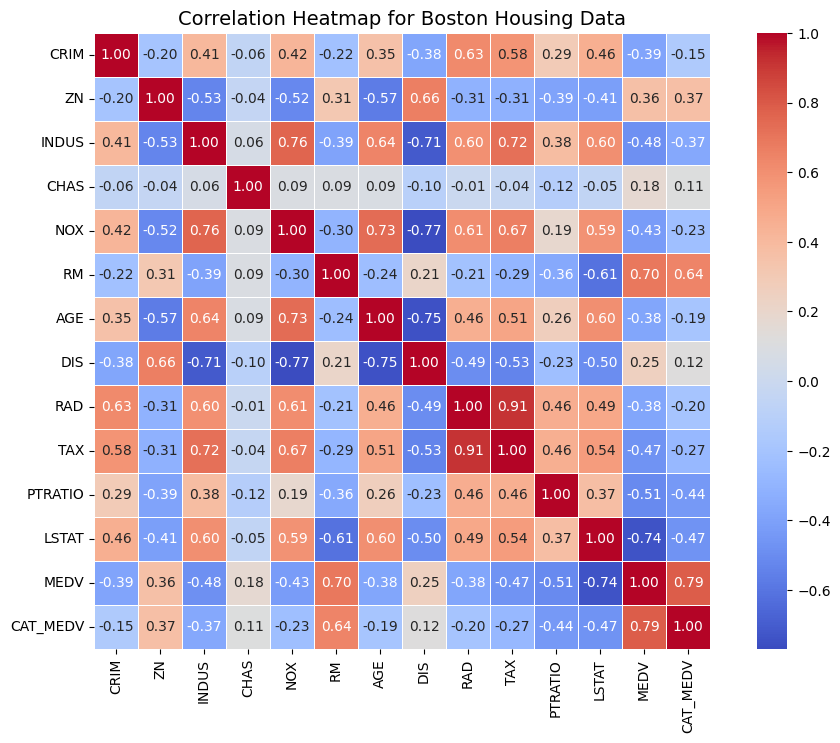

In [ ]:
import seaborn as sns

# The correlation matrix for the dataset
corr_matrix

# Set the figure size for better readability
plt.figure(figsize=(12,8))

# Draw the heatmap using Seaborn
sns.heatmap(
    corr_matrix,
    annot      = True,          # Display correlation values inside cells
    fmt        = ".2f",         # Format values to 2 decimal places
    cmap       = "coolwarm",    # Color palette for positive/negative correlation
    linewidths =0.5,            # Thin lones between cells
    square     = True           # Make the heatmap cells square-shaped
)

# Set the title for heatmap
plt.title("Correlation Heatmap for Boston Housing Data", fontsize = 14)

# Display the plot
plt.show()

###  4.4.3. Aggregation and Pivot Tables

These are powerful techniques for exploring the data by **grouping** records based on one or more variables.

* **Aggregation by Single Variable :** Use 'value_counts()' to count the frequency of **levels**(categories) within a single categorical feature.
* **Advanced Grouping ('groupby()') :** Allows aggregation by multiple variables to compute various **summary statistics**(e.g., mean, median) on other features.
* **Pivot Tables('pivot_table()') :** Allows for **reshaping the data** by aggregating variables, facilitating the comparison of metrics across different groups.

**TABLE 4.5. NUMBER OF NEIGHBORHOODS THAT BOUND THE CHARLES RIVER VS. THOSE THAT DO NOT**

In [ ]:
bostonHousing_df.CHAS.value_counts()

,count
CHAS,
0,471
1,35


**TABLE 4.6. AVERAGE MEDV BY CHAS AND RM**

##### Boston Housing Data Analysis

##### Key Variables
- **RM**: Average number of rooms per house
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **MEDV**: Median value of owner-occupied homes in $1000s
##### Why bin RM ?
- RM is a continuous variable(e.g., 3.2, 5.8, 7.1 rooms)
- Too many distinct values make it hard to observe trends in price
- Binning RM groups houses with similar room counts (e.g., 4, 5, 6 rooms), making it easier to see price trends
##### Why group by CHAS ?
- Allows comparison of prices between houses with the same number of rooms but different locations (river vs non-river)
- Helps answer questions like:
  - Do larger houses really cost more ?
  - How much does proximity to the river increase price ?
  - Does the combination of larger house + river location increase price significantly ?
##### Consequences of not binning or grouping
- Individual RM values like 6.2 or 6.8 make trends hard to observe
- Special location effects (CHAS) are unclear
- Outliers may distort analysis results
##### Analysis Workflow
1. **Bining** --> categorize RM into groups
2. **Grouping** --> by RM bins and CHAS
3. **Aggregating** --> calculate median or mean MEDV per group
4. **Trend Analysis** --> observe patterns and price trends

In [ ]:
# Create bins of size 1 for variable using the method pd.cut. By default, the method
# creates a categorical variable, e.g. (6,7]. The argument labels=False determines
# integers instead, e.g. 6.
bostonHousing_df["RM_BIN"] = pd.cut(bostonHousing_df.RM, range(0,10), labels = False)

# Compute the average of MEDV by (binned) RM and CHAS. First group the data frame
# using the groupby method, then restrict the analysis to MEDV and determines the
# mean for each group
bostonHousing_df.groupby(['RM_BIN', 'CHAS'])['MEDV'].mean()

RM_BIN  CHAS
3       0      25.3000
4       0      15.4071
5       0      17.2000
        1      22.2182
6       0      21.7692
        1      25.9187
7       0      35.9644
        1      44.0667
8       0      45.7000
        1      35.9500
Name: MEDV, dtype: float64

##### Analysis of MEDV by Number of Rooms and River Proximity

*The data is grouped first by **RM** (average number of rooms) and then within each RM group by **CHAS**(0=not adjacent to the river, 1 =adhacent to the river). The average house price (MEDV) shows:*

- As the number of rooms increases, house prices tend to rise:
   - RM_bin = 4 → MEDV ≈ 15.41 (CHAS=0)
   - RM_bin = 5 → MEDV ≈ 17.20
   - RM_bin = 6 → MEDV ≈ 21.77 (CHAS=0)
   - RM_bin = 7 → MEDV ≈ 35.96 (CHAS=0)

    Note: Since this is a trend, there can be exceptions, such as:
   - RM_bin = 3 → MEDV ≈ 25.30 (CHAS=0) - RM_bin = 4 → MEDV ≈ 15.41 (CHAS=0)

- Within the same room group, **houses adjacent to the river (CHAS=1) usually have higher prices than those not adjacent (CHAS=0)**, ass shown by the data:
    - RM_bin = 4 → 15.41 < 22.22
    - RM_bin = 5 → 17.20 < 22.92
    - RM_bin = 6 → 21.77 < 25.92
    - RM_bin = 7 → 35.96 < 44.07
    - RM_bin = 8 → 45.70 > 35.95 (an exception due to small sample size)
    
    Note: A few exceptions (e.g., RM_bin=3 or RM_bin=8) may occur due to limited data or outliers and do not reflect the general trend.

**CONCLUSION :** This grouping approach makes it easier to observe **price trends by number of rooms and the effect of river adjacency** without being confounded by the RM trend

**TABLE 4.7. PIVOT TABLES IN PYTHON**

In [ ]:
# Use pivot_table() to reshape data and generate pivot table
pd.pivot_table(bostonHousing_df, values = 'MEDV', index = ['RM_BIN'], columns =['CHAS'],
               aggfunc = np.mean,
               margins = True )

/tmp/ipython-input-2601008866.py:2: FutureWarning: The provided callable <function mean at 0x7ed0b8d4c220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(bostonHousing_df, values = 'MEDV', index = ['RM_BIN'], columns =['CHAS'],
/tmp/ipython-input-2601008866.py:2: FutureWarning: The provided callable <function mean at 0x7ed0b8d4c220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(bostonHousing_df, values = 'MEDV', index = ['RM_BIN'], columns =['CHAS'],
/tmp/ipython-input-2601008866.py:2: FutureWarning: The provided callable <function mean at 0x7ed0b8d4c220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass

CHAS,0,1,All
RM_BIN,,,
3,25.3000,NaN,25.3000
4,15.4071,NaN,15.4071
5,17.2000,22.2182,17.5516
6,21.7692,25.9187,22.0160
7,35.9644,44.0667,36.9176
8,45.7000,35.9500,44.2000
All,22.0938,28.4400,22.5328


## 4.5. CORRELATION ANALYSIS

 * **Objective :**
     - In large datasets with many predictor variables, information overlap or redundancies often occur. Correlation analysis helps identify these redundancies.
 * **Main Tool :**
     - Use a **Correlation Matrix**. This matrix displays all pairwise correlations between variables.
 * **Applications :**
    - **Data Reduction :**
        - Pairs of variables with very strong correlations (positive or negative) contain significant overlapping information and are prime candidates for removing one of the variables.
    - **Avoid Multicollinearity :**
        - Removing variables that are strongly correlated with others is very useful for avoiding multicollinearity problems.
        - **Definition of Multicollinearity :** The presence of two or more predictor variables that share the same linear relationship with the outcome variable.
    - **Detect Duplication :**
        - Correlation analysis is also a good method for detecting duplicated variables in the data (e.g., the same variable appearing multiple times under different names due to data merging or measuring the same phenomenon but in different units).
 * **Visualization :**
   - Using **Heatmaps** of the correlation matrix makes it easy to identify strong correlations.

## 4.6. REDUCING THE NUMBER OF CATEGORIES IN CATEGORICAL VARIABLES

When a categorical variable has many categories, and this variable is used as a **predictor**, many **data mining methods** will require converting it into multiple **dummy variables**.

Specifically, a variable with *m* categories will be converted into *m* or *m-1* dummy variables (depending on the method). This means that even if we have very few original categorical variables, they can still **greately inflate the dimension** of the dataset.

One way to handle this issue is to **reduce the number of catgories** by **combining** similar or related categories. Combining categories requires **expert knowledge** and **common sense**.

### 4.6.1. The role of Pivot Tables

**Pivot tables** are very useful for this task, with three main roles:


* **Rolle 1: View the sizes of each category**

*We can examine the **sizes** of the different categories and how how the **outcome variable** behaves within each category.*


* **Rolle 2: Detect categories with very few observations**

*In general, categories with **very few observations** are good candidates to be combined or labeled as 'other;. Only use the categories **most relevant** to the analysis.*

* **Role 3: Identify categories that do not seperate the classes**

*In **classification tasks** (with a categorical outcome variable), a pivot table analyzed by **outcome classes** can help identify categories that do not separate the classes. Those categories are also candidates to be included in the 'order category.*

### 4.6.2. Detailed Explanation of Roles 1 and 2: Sizes and Rare Observations


The first two points can be understood simply: in aggregation [Click here](https://colab.research.google.com/drive/1qEGx3-CW2DjMpNavh-K4WIbqAovosczY#scrollTo=aB9YkYbjCy3B&line=1&uniqifier=1), we use 'value_counts' to count the frequency of single variables. This is exactly the **sizes** being discussed, if that single variable has a low frequency (meaning few observations).

For example: while most variables might have hundreds of observations, some variables might only have 5, 6, 8, or 12 observations. This data with very small sizes is often not statistically significant enough to represent a specific trend or pattern. In practice, these 'rare' observations are often considered **noise** rather than **signal**, and grouping them into an 'other' category will help clean the data and improve model quality.

### 4.6.3. Detailed Explanation of Roles 3 :Based on the Distribution of the Outcome Variable

**FIGURE 4.1. DISTRIBUTION OF CAT.MEDV (BLUE DENOTES CAT.MEDV = 0) BY ZN. SIMILAR BARS INDICATE LOW SEPARATION BETWEEN CLASSES, AND CAN BE COMBINED**

/tmp/ipython-input-2417013617.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%%'.format(x * 100) for x in ax.get_yticks()]) # Corrected format specifier


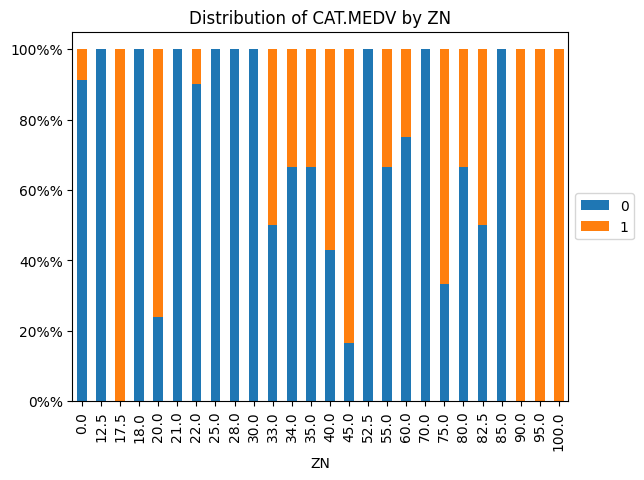

In [ ]:
import matplotlib.pyplot as plt

# Use method crosstab to create a cross-tabulation of two variables
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV, bostonHousing_df.ZN)

# CONVERT NUMBERS TO RATIOS
propTbl = tbl/tbl.sum()
propTbl.round(2)

# Plot the ratios in a stacked bar chart
ax = propTbl.transpose().plot(kind = 'bar', stacked = True)
ax.set_yticklabels(['{:.0f}%%'.format(x * 100) for x in ax.get_yticks()]) # Corrected format specifier
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

To explain the thỉd point mỏe clearly, we ưill use Figure 4.1. :

**Analyzing the distribution of the outcome variable by group**

*Returning to [TABLE 4.6. AVERAGE MEDV BY CHAS AND RM](https://colab.research.google.com/drive/1qEGx3-CW2DjMpNavh-K4WIbqAovosczY#scrollTo=RafV77cBaAiN&line=7&uniqifier=1) ,we see the outcome variable MEDV is analyzed through a combination of multiple variables (RM_BIN, CHAS). An important question arises: can we group the categories of the predictor variable ? The answer is YES, and this is especially useful when those categories have the same  distribution of the outcome variable(i.e., all residential areas have CAT.MEDV = 1).*

*An example is illustrated in Figure 4.1., where the distribution of the outcome variable CAT.MEDV is broken down by ZN (treated as a categorical variable). We can clearly see that the distribution of CAT.MEDV is identical for ZN values = 17.5, 90, 95, and 100*

**Practical application of grouping**

*The four ZN groups (17.5, 90, 95, 100) can be combined into a single group because they share the same outcome distribution.*
*Similarly, ZN groups where all residential areas have CAT.MEDV = 0 can also be combined.*
*Grouping based on similarity in the outcome variable's distribution helps simplify the model without losing important information.*

### 4.6.4. Extending to the Time Series Context

*In time series analysis, when there is a categorical variable representing seasons (like month, quarter, hour) as a predictor, reducing the number of groups is done by examining the time series plot and identifying time periods with similar trends.*

*For example, from the quarterly sales chart for Toys 'R' Us(Fogure 4.2), we see that only the 4th quarter has a distinct trend, so quarters 1-3 can be combined into a single group.*

**FIGURE 4.2.QUARTERLY REVENUES OF TOYS "R" US, 1992-1995**

*Note :*

*- The original Boston Housing dataset does not contain any time-related variables such as year or quarter. Therefore, to repreduce the line plot similar to the example (Quarterly Revenue from 1992 to 1995), I generate a synthetic dataset with quarterly revenue values. This synthetic data is created solely for visualization practice and does not come from the Boston Housing dataset.*

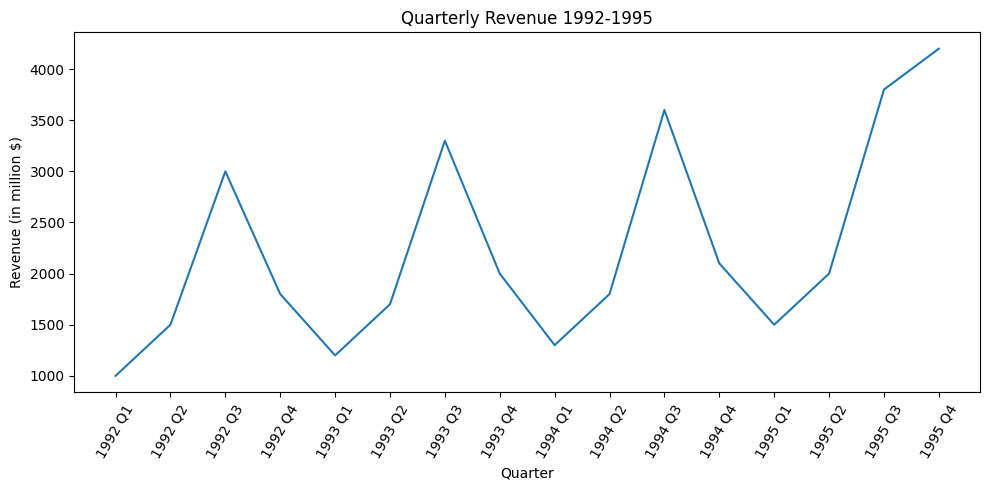

In [ ]:
# Create synthetic quarterly revenue dataset
data = {
    "Year"    :["1992 Q1","1992 Q2","1992 Q3","1992 Q4",
                "1993 Q1","1993 Q2","1993 Q3","1993 Q4",
                "1994 Q1","1994 Q2","1994 Q3","1994 Q4",
                "1995 Q1","1995 Q2","1995 Q3","1995 Q4" ],
    # Revenue values similar to the sample chart
    "Revenue": [1000, 1500, 3000, 1800,
                1200, 1700, 3300, 2000,
                1300, 1800, 3600, 2100,
                1500, 2000, 3800, 4200]
}

df = pd.DataFrame(data)

# Plot the quarterly revenue line chart
plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Revenue"])

plt.xticks(rotation=60)
plt.xlabel("Quarter")
plt.ylabel("Revenue (in million $)")
plt.title("Quarterly Revenue 1992-1995")


plt.tight_layout()
plt.show()

### 4.6.5. Conclusion

*Grouping categories in a categorical variable is not just about handling small sample sizes; more importantly, it helps highlight the behavioral structure of the target variable. When groups are combined based on the similarity of their effect on the outcome variable, the categorical variable becomes more concise while retaining the necessary statistical meaning for the predictive model.*

**The main benifits of grouping categories include :**
* **Dimension reduction :** lighter models, faster training speed.
* **Reduce overfitting :** limits the model from learning noise from low-frequency groups.
* **Remove noise from rare categories :** increases the quality and stability of the input data.
* **Increase model stability and interpretability :** more reliable forecast results, easier to present.
* **Increase generalization :** model predicts more accurately on new data.
* **Help the model recognize real trends :** avoids the signal being fragmented by too many small groups.
* **Improve visualization and reporting :** fewer groups make charts and tables easier to read and interpret.

**Notes when performing grouping :**
* **Apply consistently to both train and test sets :** use the same rules, same thresholds, and the same 'other' label.
* **Do not apply blindly :** need to check if a rare category carries important information.
* **Consider domain knowledge:** some rare categories are critically important (e.g., a rare disease in medicine).

*In summary, grouping is an important but often underestimated preprocessing step. Performing it correctly helps make predictive models more powerful and stable, while also enhacing their interpretability and application in practical data analysis.*

## 4.7. CONVERTING A CATEGORICAL VARIABLE TO A NUMERICAL VARIABLE

**a. Context :**
  - This technique applies when caegories in a categorical variable represent known intervals(e.g., age groups like '20-30', income brackets).

**b. Method :**
  - Instead of treating the category as a simple label, you replace the categorical value (e.g. "Group 2") with the **mid-interval value** (the midpoint) of the range it represents (e.g., for the '20-30' interval, use '25')

**c. Outcome :**
  - The variable is transformed into a single numerical variable

**d. Benefit :**
  - This conversion **eliminates the need to create multiple dummy variables** for those categories, simplifying the feature set.

## 4.8. PRINCIPAL COMPONENTS ANALYSIS

**1. Definition & Purpose**
* PCA is a statistic procedure used for **dimension reduction**, particularly useful when handling datasets with a large number of variables.

**2. Ideal Prerequisites**
* **a. Scale :** It is especially valuable when subsets of measurements are recorded on the **same scale**.
* **b. Correlation :** The method works best when the variables are **highly correlated**.


**3. Mechanism & Outcome**
* **a. Transformation:** It compresses data into a few new variables (often as few as three).
* **b. Composition:** These new variables are **weighted linear combinations** of the original variables.
* **c. Information Retention:** Despite the reduction, the new variables retain the **majority of the information** found in the full original set.

**4. Data Type Constraints**
* **a. Numerical Data:** PCA is explicitly intended for use with **numerical variables**.
* **b. Categorical Data:** For categorical variables, PCA is not appropriate; methods such as **Correspondence Analysis** are more suitable.



**Principal  Component  Analysis (PCA) Steps**

To understand how PCA works, refer to [Principle Component Analysis: Visualized in 3D](https://youtu.be/De8HoMbis4k?si=Z8AunJJc7Coc3RGn)

**Step 1: Data Digitization (Data processing / Vectorization )**
* **Purpose :** Covert raw data (image, colors) into numerical structures (Matrix $A$).
* **Explanatiion :** The image (9 pixel, 3 RGB channels) is vectorized. Each $3 \times 3$ color channel matrix is 'stretched' into a column vecto of length 9 by stacking its column.

Red channel vector:$$Column1, Column2, Column3$$
Green channel vector: $$Column1, Column2, Column3$$
Blue channel vector: $$Column1, Column2, Column3$$
* These 3 vectors combine into a $9 \times 3$ matrix $A$, where each column represents a color channel (feature).

* **Output:** Numerical matrix $A$, the digitized form of the original image.


**Step 2: Plotting the Data in 3D Space - "Each pixel becomes a point"**
* **Purpose :** Visualize relationships among color channels (features).
* **Coordinate System :** X-axis: Red intensity, Y-axis: Green intensity, Z-axis: Blue intensity
* Each row of $A$ (one pixel/observation) becomes a point $(x, y, z)$ in 3D space, forming a **3D point cloud** of 9 points.
* **Output :** A 3D scatter plot where each point represents a pixel.


**Step 3: Data centering - "Shifting the Cloud to Origin"**
* **Purpose :** Remove bias caused by differences in channel means so PCA finds true directions of variation.
* **Operation :** Subtracting the mean of each column (channel) in matrix $A$:

    $$\bar{A}=A-\text{mean}(A)$$
* **Output :** A centered point cloud whose center lies exactly at the origin $(0, 0, 0)$


**Step 4: Covariance Matrix - "Measuring relationships"**
* **Purpose :** Quantify how pairs of color channels vary together.
* **Formula :**
   $$\text{Cov}(\bar{A}) = \frac{1}{n-1}\bar{A}^T\bar{A}$$
* **Result :** A $3 \times 3$ covariance matrix, where element $(i, j)$ measures relationships between channel $i$ and channel $j$.
* **Output :** Covariance matrix - the statistical core of the dataset.

**Step 5: Eigen-Decomposition and find principal axes (PC1, PC2, PC3)**

**Algebraic Perspective**

* **Purpose :** Decompose $\text{Cov}(\bar{A})$ to find the most important directions of variability.
* **Solve :** $$\text{det}(\text{Cov}(\bar{A}) - \lambda I) = 0$$
* This yields: **Eigenvalues ($\lambda$)** (amount of variance) and **Eigenvectors (P)** (directions of maximum variance).
* **Decomposition :** $$\text{Cov}(\bar{A}) = P D P^{-1}$$
    * $D$ : diagonal matrix containing eigenvalues.
    * $P$ : matrix of eigenvectors (each column is a principal component direction).
* **Output :** Principal axes (PC1, PC2, PC3) and their variances.


**Geometric Perspective**
* **Step 5.1:** Construct a **variance ellipsoid** fitted around the point cloud, oriented by eigenvectors, with axis lengths $\propto \sqrt{\text{eigenvalues}}$
* **Step 5.2 (Finding PC1):** Choose the direction through the ellipsoid center were the **projection spread is maximum**. This is the longest axis.
* **Step 5.3 (Finding PC2):** Choose the direction with maximum variance **orthogonal** to PC1.
* **Step 5.4 (Finding PC3):** PC3 is the line **perpendicular** to both PC1 and PC2, completing the orthogonal PCA coordinate system.








**Step 6: Projecting Data onto the New Axes**

**Algebraic Perspective**
* **Purpose :** Convert data from the original RGB system to the PCA coordinate system.
* **Formula :** $$\text{Scores}=\bar{A}\times P$$
   * $\text{Scores}$: new coordinates (PC1, PC2, PC3).
   * $\bar{A}$: centered data.
   * $P$ : eigenvector matrix
* Each row of $\text{Scores}$ gives the new PCA-based coordinates of a pixel.

**Geometric Perspective**
* All PCA projections are **orthogonal projections**
* **1D Projection(onto PC1, PC2, PC3) :** Projection onto PC1 gives the logest 'shadow' (most variance). PC3 usually captures noise.
* **2D Projection (onto PC1-PC2,..) :** The PC1-PC2 plane gives the clearest 2D view, capturing main structure.

**Step 7: Compression and reconstruction**

**Algebraic Perspective**
* **Purpose :** To reconstruct the data using only $k$ principal components (where $k<3$ for compression)
* **Formula :** $$\hat{A}=\text{Scores}_k\times P_k^T + \text{Mean}$$

    * $\hat{A} :$ reconstructed data.

    * $\text{Scores}_k :$ projections using only $k$ components

    * $P_k$ : first $k$ eigenvectors.

    * $\text{Mean}$: the mean removed earlier.
      

* **Result :** This gives a compressed approximation of the original data.
* **Output :**


**Geometric Perspective**
1. **Matrix Compression :** Keep only PC1 and PC2; discard PC3( mostly noise) to result in a smaller dataset retaining the main structure.
2. **Image-Layer Reconstruction :** Transforming scores back shows:
     * PC1 layer: main structure and contrast.
     * PC2 layer: secondary details.
     * PC3 layer: appears noisy, validating its removal in compression.

###  Example 2: Breakfast Cereals

**TABLE 4.8. SAMPLE FROM THE 77 BREAKFAST CEREALS DATASET**

In [ ]:
cereals_df = pd.read_csv("Cereals.csv", delimiter = ",")
# Capitalize the first letter of each column name
# This makes the column headers look cleaner and more readable
cereals_df.columns = cereals_df.columns.str.title()
# Rename
cereals_df.rename(columns={'Name':'Cereal'}, inplace = True)
# Print the entire DataFrame as a string
# .to_string(index=True) converts the DataFrame to a string for printing
# to_string() displays all columns in a single output without wrapping
print(cereals_df.head(21).to_string(index=True))


                       Cereal Mfr Type  Calories  Protein  Fat  Sodium   Fiber   Carbo  Sugars   Potass  Vitamins  Shelf  Weight   Cups  Rating
0                   100%_Bran   N    C        70        4    1     130 10.0000  5.0000  6.0000 280.0000        25      3  1.0000 0.3300 68.4030
1           100%_Natural_Bran   Q    C       120        3    5      15  2.0000  8.0000  8.0000 135.0000         0      3  1.0000 1.0000 33.9837
2                    All-Bran   K    C        70        4    1     260  9.0000  7.0000  5.0000 320.0000        25      3  1.0000 0.3300 59.4255
3   All-Bran_with_Extra_Fiber   K    C        50        4    0     140 14.0000  8.0000  0.0000 330.0000        25      3  1.0000 0.5000 93.7049
4              Almond_Delight   R    C       110        2    2     200  1.0000 14.0000  8.0000      NaN        25      3  1.0000 0.7500 34.3848
5     Apple_Cinnamon_Cheerios   G    C       110        2    2     180  1.5000 10.5000 10.0000  70.0000        25      1  1.0000 0.7500 

**TABLE 4.9. DESCRIPTION OF THE VARIABLES IN THE BREAKFAST CEREAL DATASET**

In [ ]:
descrip = pd.read_excel('DESCRIPTION_OF_THE_VARIABLES_IN_THE_BREAKFAST_CEREAL_DATASET.xlsx')
descrip

,Variable,Description
0,mfr,"Manufacturer of cereal (American Home Food Products, General Mills, Kellogg, etc.)"
1,type,Cold or hot
2,calories,Calories per serving
3,protein,Grams of protein
4,fat,Grams of fat
5,sodium,Miligrams of sodium
6,fiber,Grams of dietary fiber
7,carbo,Grams of complex carbohydrates
8,sugars,Grams of sugars
9,potass,Miligrams of potassium


**TABLE 4.10. CEREAL CALORIES AND RATINGS**

In [ ]:
data = cereals_df[['Cereal', 'Calories', 'Rating']]

In [ ]:
data

,Cereal,Calories,Rating
0,100%_Bran,70,68.4030
1,100%_Natural_Bran,120,33.9837
2,All-Bran,70,59.4255
3,All-Bran_with_Extra_Fiber,50,93.7049
4,Almond_Delight,110,34.3848
...,...,...,...
72,Triples,110,39.1062
73,Trix,110,27.7533
74,Wheat_Chex,100,49.7874
75,Wheaties,100,51.5922


**Understanding S (Covariance) vs. Correlation in Code**

**1. The Distance**
* **Covariance Matrix ($S$) :** Measures variability in original units(e.g., measuring scale matters). In Python, this corresponds to 'df.cov()'
* **Correlation Matrix :** Measures the strength of linear relationships on a normalized scale (-1 to 1). In Python, this is 'df.corr()'.
* **Key Connection:** PCA on standardized data (using  "StandardScaler") is mathematically equivalent to performing PCA on the Correlation Matrix.

**2. Role in PCA**
* $S$ is the mathematical engine room of PCA. It tells the algorithm which directions have the most 'information' (variance)
* **Interpretation :** A large value in $S$ (or high correlation) implies redundancy. PCA exploits this to compress data.

**3. Formula Reference**
* The covariance $S_{ik}$ between two variables is calculated as:


$$s_{jk} = \frac{1}{n-1} \sum_{i=1}^{n} (x_{ij} - \bar{x}_j)(x_{ik} - \bar{x}_k)$$
* The Correlation Matrix ($R$)

$$r_{jk} = \frac{s_{jk}}{\sigma_j \cdot \sigma_k}$$

In [ ]:
# Select the two features 9columns) for PCA analysis
data_01 = cereals_df[[ 'Calories', 'Rating']]

In [ ]:
data_01

,Calories,Rating
0,70,68.4030
1,120,33.9837
2,70,59.4255
3,50,93.7049
4,110,34.3848
...,...,...
72,110,39.1062
73,110,27.7533
74,100,49.7874
75,100,51.5922


**Figure 4.3. SCATTER PLOT OF RATING VS. CALORIES FOR 77 BREAKFAST CEREALS, WITH THE TWO PRINCIPAL COMPONENT DIRECTIONS**

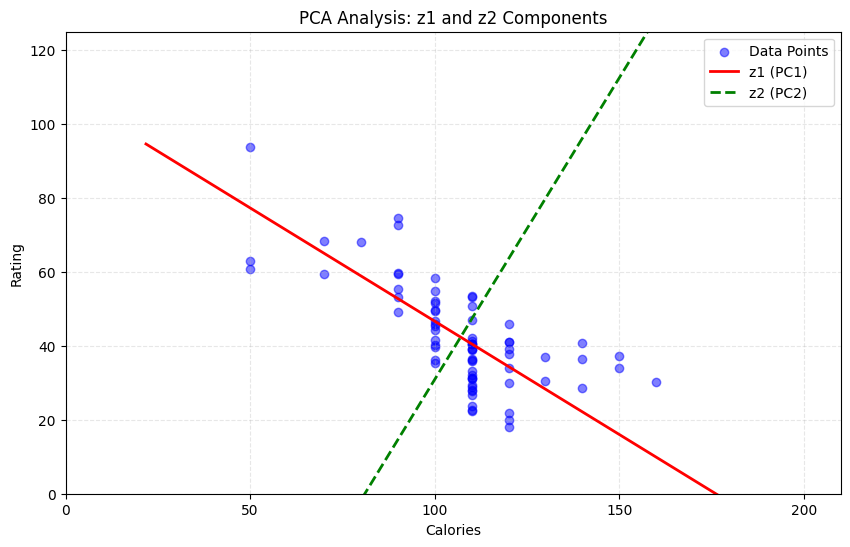

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1. Load Data (Assumed: cereals_df is already defined) ---
# Select the two columns needed for PCA
X = cereals_df[['Calories', 'Rating']]

# --- 2. Perform PCA ---
# Initialize PCA to retain 2 components
pca = PCA(n_components=2)
# Fit the model to the data
pca.fit(X)

# Retrieve information from PCA object
mean = pca.mean_          # The centroid/mean point of the data
components = pca.components_ # The principal component vectors (z1, z2)

# Extract individual principal component vectors
v1 = components[0] # Principal Component 1 (PC1) vector - Direction of maximum variance
v2 = components[1] # Principal Component 2 (PC2) vector - Orthogonal to PC1

# --- 3. Function to Draw the Principal Component Axes ---
def draw_vector_line(center, vector, length, color, style, label):
    """Calculates start and end points and plots a line through the center along the vector direction."""
    # Calculate start point
    x1 = center[0] - vector[0] * length
    y1 = center[1] - vector[1] * length
    # Calculate end point
    x2 = center[0] + vector[0] * length
    y2 = center[1] + vector[1] * length
    # Plot the extended line
    plt.plot([x1, x2], [y1, y2], color=color, linestyle=style, linewidth=2, label=label)

# --- 4. Plotting the Results ---
plt.figure(figsize=(10, 6))

# Plot the original data points (Calories vs. Rating)
plt.scatter(X['Calories'], X['Rating'], alpha=0.5, color='blue', label='Data Points')

# Draw the two principal component axes (extending length=100 for visualization)

# z1: PC1 (Red, Solid line)
draw_vector_line(mean, v1, 100, 'red', '-', 'z1 (PC1)')

# z2: PC2 (Green, Dashed line)
draw_vector_line(mean, v2, 100, 'green', '--', 'z2 (PC2)')

# --- 5. Configure Plot Aesthetics ---
# Set X and Y axis ticks
plt.xticks([0, 50, 100, 150, 200])
plt.yticks([0, 20, 40, 60, 80, 100, 120])
# Set plot limits
plt.xlim(0, 210)
plt.ylim(0, 125)

# Set axis labels
plt.xlabel("Calories")
plt.ylabel("Rating")

# Set the plot title
plt.title("PCA Analysis: z1 and z2 Components")

# Display legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Show the final plot
plt.show()

In [ ]:
# Covariance Matrix
data_01.cov()

,Calories,Rating
Calories,379.6309,-188.6816
Rating,-188.6816,197.3263


In [ ]:
data_01.mean()

,0
Calories,106.8831
Rating,42.6657


**Covariance Matrix**
* Value : -193.207572 ( Intersection of Calories and Rating ).
* Direction : The **negative sign (-)** indicates an **inverse relationship**(as Calories increase, Rating decreases).
* Limitation : The magnitude (193.2) is large due to the different scales of measurement (hundreds vs. tens), not necessarily because the relationship is **strong**. It is **scale-dependent**.




**The total variability**

*The total variability* here is the sum of the variances of the two variables, which in case is 379.630895 + 197.326321 = 577

*This means that **calories** accounts for 66%= 379.63/577 of the total variability, and **rating** for the remaining 34%.*

*If we drop one of the variables for the sake of dimension reduction, we lose at least 34% of the total variability.*

*Can we redistribute the total variability between two new variables in a more polarized way? If so, it might be possible to keep only the one new variable that (hopefully) accounts for a large portion of the total variation*




In [ ]:
data_01.corr()

,Calories,Rating
Calories,1.0000,-0.6894
Rating,-0.6894,1.0000


* Value: -0.689
* Strength: This is a **normalized** value between [-1, 1]. It indicates a **~69% information overlap** (redundancy) between Calories and Rating.
* The Diagonal : You will always see 1.000 on the diagonal (e.g. Calories vs. Calories) because a variable is always perfectly correlated with itself.




$CONCLUSION$
- While **cov** shows the trend, **corr()** is the standard metric for feature selection. A correlation of **-0.69** suggests moderate-to-strong multicollinearity.

$Advanced : Variance Inflation Factor (VIF)$

- While Pearson correlation **(.corr())** detects **pairwise** relationships($A \≈ B$), **VIF** detects if a variable is a linear combination of **multiple** other variable($A \approx B + C + D$ )

*Formula:*
$$VOF_i = \frac{1}{1 - R_i^2}$$

*Thresholds*

* **VIF < 2:** **SAFE**. No multicollinearity.
* **2 <= VIF <= 10:** **Caution**. Signs of multicollinearity (often acceptable).
* **VIF > 10 :** **Severe**. Strong multicollinearity (The variable should likely be removed).


Since Pandas does not have a built-in VIF function, we use 'statsmodels'

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Set display format for pandas DataFrames (4 decimal places)
pd.options.display.float_format = '{:.4f}'.format

# 2. Define X (Independent Variables/Predictors)
# iloc[:, 3:-1]: Select columns from index 3 up to the second-to-last column (excluding 'Rating').
# select_dtypes: elect_dtypes: Ensure only numeric columns are included for VIF calculation.
X = cereals_df.iloc[:, 3:-1].select_dtypes(include=[np.number])

# 3. Drop rows containing NaN values (Ensures clean data for VIF calculation, as it's regression-based)X = X.dropna(axis=0)
X = X.dropna(axis=0)


# 4. Add a constant term (intercept) and calculate VIF
# VIF calculation requires an intercept, treating the VIF for the constant as the first element (index 0).X_with_const = add_constant(X)
X_with_const = add_constant(X)

# Calculate VIF for each feature. We skip index 0 (the constant).
vif_list = [variance_inflation_factor(X_with_const.values, i+1)
               for i in range(len(X.columns))]

# Create a DataFrame to store the results
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = vif_list

# 5. Print the sorted VIF resultsprint("--- KẾT QUẢ VIF ---")
print(vif_data.sort_values(by="VIF", ascending=False))

     Feature     VIF
0   Calories 18.9567
6     Sugars 18.2023
5      Carbo 16.2078
7     Potass 11.4216
4      Fiber 10.7459
10    Weight  5.8762
2        Fat  5.2816
1    Protein  2.8826
11      Cups  1.6859
9      Shelf  1.6431
8   Vitamins  1.5506
3     Sodium  1.3551


*The conclusion of the Variance Inflation Factor (VIF) analysis is the strongest justification for transitioning to Principal Components Analysis (PCA). With the maximum VIF reaching 18.96 (at Calories) and five independent variables exceeding the threshold of 10, the data confirms the existence of severe and complex multicollinearity, which extends beyond simple pairwise relationships. In this situation, manual variable removal (based on VIF) is impractical because it is time-consuming (requiring repeated removal and recalculation) and carries the risk of unnecessarily losing important nutritional information. Therefore, VIF justifies the necessary application of PCA—an automated dimension reduction technique—to immediately create a new set of uncorrelated (Orthogonal) variables, thoroughly resolving the multicollinearity issue while retaining most of the essential information.*

**Figure 4.3. SCATTER PLOT OF RATING VS. CALORIES FOR 77 BREAKFAST CEREALS, WITH THE TWO PRINCIPAL COMPONENT DIRECTIONS**

**Table 4.11. PCA ON HE TWO VARIABLES CALORIES AND RATING**

In [ ]:
# Initialize PCA to compute the top 2 components (PC1, PC2)
pcs = PCA(n_components= 2)
# Fit the PCA model to the selected features ('Calories', 'Rating')
# This step calculates the mean, covariance matrix, eigenvectors, and eigenvalues.
pcs.fit(cereals_df[['Calories','Rating']])

PCA(n_components=2)

In [ ]:
# --- Creating the PCA summary Table ---

# Generate a DataFrame summarizing the performance and importance of each Principal Components (PC)
pcsSummary = pd.DataFrame(
    # Calculate the standard deviation of each PC (square root of the eigencalue/ variance)
    {'Standard deviation'  : np.sqrt(pcs.explained_variance_),

     # Calculate the proportion of total variance explained by each PC
     'Proportion of variance' : pcs.explained_variance_ratio_,

     # Calculate the cumulative proportion of variance explained (how muc info is retained)
     'Cumulative proportion' : np.cumsum(pcs.explained_variance_ratio_)}
)


# Transpose the DataFrame so PCs (PC1, PC2) become the columns
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']

# Display the summary table rounded to 4 decimal places
pcsSummary.round(4)


,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


In [ ]:
# --- Creating the Components/ Loadings Table ---

# Create a DataFrame for the Principal Component **Loadings** (Eigenvectors)
pcsComponents_df = pd.DataFrame(
    # pcs.components_ contains the eigenvectors (rows are PCs, columns are original features )
    pcs.components_,

    # Columns represent the original features in the context of the new PC space
    columns = ['PC1', 'PC2'],

    # Indices represent the original features
    index = ['Calories', 'Rating']
)


# Display the components matrix (useful for interpretation: how much each original features contributes to each PC)
pcsComponents_df


,PC1,PC2
Calories,0.8471,-0.5315
Rating,0.5315,0.8471


In [ ]:
# --- Calculate the Scores (Transformed data) ----

# Calculate the new coordinates (Scores) by projecting the original data onto the PC axes
# This uses the transformation formula: Scores = A_centered *P (eigenvector matrix)
scores = pd.DataFrame(
    # pcs.transform applies the centered data projection
    pcs.transform(cereals_df[['Calories', 'Rating']]),
    # The columns are the new coordinates in the PCA space
    columns = ['PC1', 'PC2'],
    # Retain the original index
    index = cereals_df.index
)

# Display the first few rows of the transformed data

scores.head()

,PC1,PC2
0,-44.9215,2.1972
1,15.7253,-0.3824
2,-40.1499,-5.4072
3,-75.3108,12.9991
4,7.0415,-5.3577


### Principal Components

### Normalizing the Data

**TABLE 4.12. PCA OUTPUT USING 13 NUMERICAL VARIABLES IN THE BREAKFAST CEREALS DATASET. THE TABLE SHOWS RESULTS FOR THE FIRST FIVE PRINCIPAL COMPONENTS**

In [ ]:
pcs = PCA()
pcs.fit(cereals_df.iloc[:, 3:].dropna(axis = 0))
pcsSummary_df = pd.DataFrame(
    {'Standard deviation'     : np.sqrt(pcs.explained_variance_),
     'Proportion of variance' : pcs.explained_variance_ratio_,
     'Cumulative proportion'  : np.cumsum(pcs.explained_variance_ratio_)}
)
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.0630,0.0000
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
pcsComponents_df = pd.DataFrame(
    pcs.components_.transpose(),
    columns = pcsSummary_df.columns,
    index = cereals_df.iloc[:, 3:].columns
)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Calories,0.0780,-0.0093,0.6292,-0.6010,0.4550
Protein,-0.0008,0.0088,0.0010,0.0032,0.0562
Fat,-0.0001,0.0027,0.0162,-0.0253,-0.0161
Sodium,0.9802,0.1409,-0.1359,-0.0010,0.0139
Fiber,-0.0054,0.0307,-0.0182,0.0205,0.0136
Carbo,0.0172,-0.0168,0.0174,0.0259,0.3493
Sugars,0.0030,-0.0003,0.0977,-0.1155,-0.2991
Potass,-0.1349,0.9866,0.0368,-0.0422,-0.0472
Vitamins,0.0943,0.0167,0.6920,0.7141,-0.0370
Shelf,-0.0015,0.0044,0.0125,0.0056,-0.0079


**comments**

*Use method dropna(axis=0) to remove observations that contain missing values.*

*Bote the use of the **transpose** method to get the scores*

**TABLE 4.13. PCA OUTPUT USING "ALL NORMALIZED" 13 NUMERICAL VARIABLES IN THE
BREAKFAST CEREALS DATASET. THE TABLE SHOWS RESULTS FOR THE FIRST FIVE PRINCIPAL COMPONENTS**

In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis = 0)))
pcsSummary_df = pd.DataFrame(
    {'Standard deviation'     : np.sqrt(pcs.explained_variance_),
     'Proportion of variance' : pcs.explained_variance_ratio_,
     'Cumulative proportion'  : np.cumsum(pcs.explained_variance_ratio_)}
)
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0000
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0000
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0000


In [ ]:
pcsComponents_df = pd.DataFrame(
    pcs.components_.transpose(),
    columns = pcsSummary_df.columns,
    index = cereals_df.iloc[:, 3:].columns
)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Calories,-0.2995,0.3931,0.1149,-0.2044,0.2039
Protein,0.3074,0.1653,0.2773,-0.3007,0.3197
Fat,-0.0399,0.3457,-0.2049,-0.1868,0.5869
Sodium,-0.1834,0.1372,0.3894,-0.1203,-0.3384
Fiber,0.4535,0.1798,0.0698,-0.0392,-0.2551
Carbo,-0.1924,-0.1494,0.5625,-0.0878,0.1827
Sugars,-0.2281,0.3514,-0.3554,0.0227,-0.3149
Potass,0.4020,0.3005,0.0676,-0.0909,-0.1484
Vitamins,-0.1160,0.1729,0.3879,0.6041,-0.0493
Shelf,0.1713,0.2651,-0.0015,0.6389,0.3291


**Use *preprocessing.scale* to normalize data prior to running PCA.**

### Using Pricipal Components for Classification and Prediction

**Figure 4.4. Scatter Plot Of The Second VS. Frist Components Scores For The Normalized Breakfast Cereal Output (CREATED USING TABLEAU)**

##### A. Supervised vs. Unsupervised Learning & PCA

In Data Mining, machine learning algorithms are generally categorized into two main branches. **PCA (Principal Component Analysis)**, the method we are using here, belongs to the **Unsupervised** group.

**Key Differences**
###### **1. Supervised Learning**
* **Concept:** *The data comes with 'answers'*
* **Example:** *Teaching a computer to distinguish between a Dog and a Cat by showing it images and explicitly telling it, 'This is a dog', 'That is a cat'*
* **Goal:** *Prediction or Classification (predicting results for new data)*
###### **2. Unsupervised Learning**
* **Concept:** *The data has 'no answers'(no labels)*
* **Example:** *Giving a computer a mixed pile of animal photos and asking it to group similar ones together (Clustering or PCA)*
* **Goal:** *Pattern Discovery or Dimension Reduction (understanding the hidden structure)*

**Comparison Table**

| Feature | Supervised Learning | Unsupervised Learning (PCA) |
| :--- |:--- |:--- |
| **Input Data** | Labeled ($X$ Input + $Y$ Output) | Unlabeled (Only $X$ Input) |
| **Task** |Regression, Classification | Clustering, Dimension Reduction |
| **Core question** | *"What is this?"* | *"How is this data structured ?"*|

##### B. The importance of Data Normalization

*Normalization (often using 'StandardScaler') is the process of bringing all variables to the same scale (typically Mean = 0, Standard Deviation = 1)*

**Why is this necessary ? A concrete Example**

Imagine you have a bowl of cereal with the following data:
* **Sodium:** 200 mg (A very large number)

* **Fiber:** 2 g (A very small number)

If we do not normalize the data, the algorithm sees **$200\gg 2$**. Consequently, it incorrectly assumes that **Sodium is 100 times more important than Fiber**.

**The Solution: Z-score Standardization**

We apply the formular:

$$Z = \frac{\text{Value} - \text{Mean}}{\text{Standard deviation}}$$

**The process :**
1. *Input :* Sodium = 200, Fiber = 2
2. *Calculation :* (Assuming average Sodium is 150 and Fiber is 1.5)
    * New Sodium
    $\approx(200 - 150) /\text{std}\approx \mathbf{1.2}$
    * New Fiber
    $\approx(2 - 1.5) /\text{std}\approx \mathbf{1.1}$
3. *Output :* Both variables are now close to 1. They have equal weight, allowing the machine to compare them fairly.

##### C. Idea Framework: Visualizing Figure 4.4. (PCA Scatter Plot)

The following framework outlines the logical steps to reproduce Figure 4.4

**STEP 1: DATA CLEANING**
* **Purpose :** Ensure data integrity for mathematical operations.
* **Action :** remove all rows containing 'NaN' (missing values). Reset the index afterwards.
* **Reason :** PCA is based on linear algebra (matrix calculations). A matrix with 'holes' (missing values) will cause the calculation to fail immediately.

**STEP 2: FEATURE SELECTION**
* **Purpose :** Separate quantitive data from qualitative data.
* **Action :** Select only numerical columns (e.g., 'calories', 'sodium', 'fiber') for the algorithm. Extract the 'name' column into a separate variable.
* **Reason :** PCA calculates variance based on numbers. Text columns (like names) cannot be calculated but must be saved to label the graph later.

**STEP 3: DATA NORMALIZATION (CRUCIAL)**
* **Purpose :** Eliminate bias caused by different units of measurement.
* **Action :** Use 'StandardScaler' to transform all numerical data into Z-scores.
* **Reason :** As shown in the example above, without normalization, large-value variables (Sodium) would dominate small-value variables(Fiber), distorting the dimension reduction results

**STEP 4: DIMENSION REDUCTION (APPLYING PCA)**
* **Purpose :** Compress information from high-dimensional space (13 variables) to low-dimensional space (2 variables)
* **Action :** Run the PCA algorithm to extract the first two principal components (PC1 and PC2).
* **Reason :** Humans cannot visualize a 13-dimenional graph. PC1 and PC2 represent the two best 'viewing angles' that retain  the most information from the original data.

**STEP 5: VISUALIZATION & ANNOTATION**



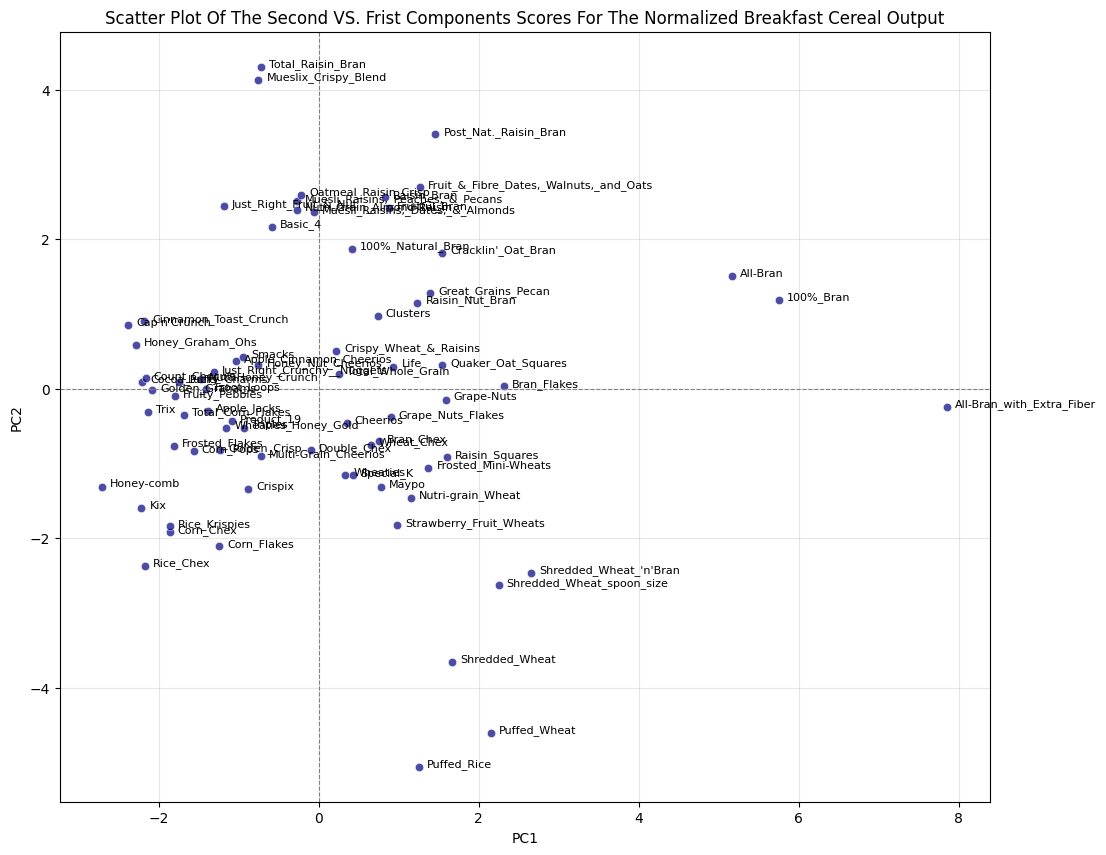

In [ ]:
# Step 1: Data Cleaning & Preparation
cereals_df.dropna(axis = 0, inplace = True)
cereals_df.reset_index(drop = True, inplace = True)
# Step 2:Feature selection
X = cereals_df[['Calories', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbo',
            'Sugars', 'Potass', 'Vitamins', 'Shelf', 'Weight', 'Cups', 'Rating' ]]


# Step 3: Normalizatiion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


# Step 4: Dimension Reduction
pca = PCA(n_components = 2)
components = pca.fit_transform(X_norm)
# Create DataFrame for plotting; attach names for labels
pca_df = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])
pca_df['Label'] = cereals_df['Cereal']


# Step 5: Visualization
plt.figure(figsize=(12, 10))
# Plot points
sns.scatterplot( x = 'PC1', y = 'PC2', data = pca_df, color = 'navy', alpha =0.7)
# Annotate each point with cereal name
for i in range(len(pca_df)):
  plt.text(
      x = pca_df.PC1[i] + 0.1,
      y = pca_df.PC2[i],
      s = pca_df.Label[i],
      fontsize = 8
  )
# Final formatting
plt.title('Scatter Plot Of The Second VS. Frist Components Scores For The Normalized Breakfast Cereal Output')
plt.axhline(0, c='grey', ls='--', lw=0.8)
plt.axvline(0, c='grey', ls='--', lw=0.8)
plt.grid(True, alpha=0.3)
plt.show()

## 4.9. Dimension Reduction Using Regression Models

**4.9.1. Context and Model Optimization**

* **Dimensionality Reduction** is critical in **Multivariate Data Processing** for **Model optimization** and improving **Predictive performance**.
* Unlike **exploratory** methods like **PCA** (which ignore the **Target Variable**), **Regression model-based** approaches directly assess **Feature Importance** relative to the outcome.

**4.9.2. Feature Subset Selection (Using AIC/ BIC)**

* **Feature subset selection** identifies the **Optimal feature combination** using **Model evaluation criteria** like **AIC** and **BIC**.
* These criteria balance **model complexity** and **goodness of fit** by **penalizing** overly complex models.
* **Formula:**

  a. $AIC = 2k-2\ln(\hat{L})$

  b. $BIC = k\cdot\ln(n) -2\ln(\hat{L})$

**4.9.3. Processing Categorical Features**
* Understanding the **Reference Category** is key for **categorical feature** handling and **category merging(binning)**
* **Category merging** rules are based on **regression coefficients**.

  a. Merge categories whose coefficients have a **p-value > 0.05** (no **Statistically significant difference**) compared to the reference category.

  b. Merge categories with similar coefficient values and signs, indicating equivalent impact on the target.

**4.9.4. Handling Multicollinearity with Regularized Regression**
* **Regularized regression** uses the **L2 Penalty** ($\lambda\sum\beta^2$), which **shrinks coefficients** towards zero.
* **Lasso regression** uses the **L1 penalty** ($\lambda\sum|\beta|$), which performs **feature selection** by setting coefficients to **exactly 0**.

**4.9.5 Bias-Variance Tradeoff and Method Selection**
* Regularization methods yeild **biased estimates**, reflecting the **Bias-variance tradeoff**: increasing **Bias** slightly to significantly reduce **variance**, improving **stability** and **generalization**.
* **Selection criteria:**
  a. Prioritize **feature subset selection (AIC/BIC)** for **interpretability**.

  b. Prioritize **Ridge/Lasso** (with **Cross-validation** for $\lambda$ selection) for **prediction** and managing **multicollinearity**.

References:

[Effect of Multicollinearity on Variable Selection in Multiple Regression](https://www.researchgate.net/publication/356977729_Effect_of_Multicollinearity_on_Variable_Selection_in_Multiple_Regression)


[Ridge vs Lasso Regression, Visualized!!!](https://www.youtube.com/watch?v=Xm2C_gTAl8c)


[AnalyticsX: AIC and BIC](https://www.youtube.com/watch?v=4al2LfJz6Q8)

## 4.10. Dimension Reduction Using Classification and Regression Trees

**4.1. Breakfast Cereals**

Use the data for the breakfast cereals example in Section 4.8 to explore and summarize the data as follows:

* a. Which variables are quantitative/numerical? Which are ordinal? Which are nominal?

* b. Compute the mean, median, min, max, and standard deviation for each of the quantitative variables. This can be done using pandas as shown in Table 4.3.

* c. Plot a histogram for each of the quantitative variables. Based on the histograms and summary statistics, answer the following questions:

     i. Which variables have the largest variability?

     ii. Which variables seem skewed?

     iii. Are there any values that seem extreme?
  
* d. Plot a side-by-side boxplot comparing the calories in hot vs. cold cereals. What does this plot show us?
* e. Plot a side-by-side boxplot of consumer rating as a function of the shelf height. If we were to predict consumer rating from shelf height, does it appear that we need to keep all three categories of shelf height?
* f. Compute the correlation table for the quantitative variable (method corr()). In addition, generate a matrix plot for these variables (see Table 3.4 on how to do this using the seaborn library).
     i. Which pair of variables is most strongly correlated?
     
     ii. How can we reduce the number of variables based on these correlations?
     
     iii. How would the correlations change if we normalized the data first?
     
* g. Consider the first Principal Component (PC) of the analysis of the 13 numerical variables in Table 4.12. Describe briefly what this PC represents.

**4.2. University Rankings**

The dataset on American college and university rankings (available from www.dataminingbook.com) contains information on 1302 American colleges and universities offering an undergraduate program. For each university, there are 17 measurements that include continuous measurements (such as tuition and graduation rate) and categorical measurements (such as location by state and whether it is a private or a public school).

* a. Remove all categorical variables. Then remove all records with missing numerical measurements from the dataset.

* b. Conduct a Principal Components Analysis (PCA) on the cleaned data and comment on the results. *Should the data be normalized?* Discuss what characterizes the key components you consider.

**4.3. Sales of Toyota Corolla Cars**

The file ToyotaCorolla.csv contains data on used cars (Toyota Corolla) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal will be to predict the price of a used Toyota Corolla based on its specifications.

* a. Identify the categorical variables.

* b. Explain the relationship between a categorical variable and the series of binary dummy variables derived from it.

* c. How many dummy binary variables are required to capture the information in a categorical variable with $N$ categories?

* d. Use Python to convert the categorical variables in this dataset into dummy variables, and explain in words, for one record, the values in the derived binary dummies.

* e. Use Python to produce a correlation matrix and matrix plot. Comment on the relationships among variables.

**4.4. Chemical Features of Wine**
Table 4.14 shows the PCA output on data (non-normalized) in which the variables represent chemical characteristics of wine, and each case is a different wine.

* a. The data are in the file Wine.csv. Consider the rows labeled "Proportion of Variance." Explain why the value for PC1 is so much greater than that of any other column.

* b. Comment on the use of normalization (standardization) in part (a).